# Datetime Parsing with Pandas

Time-series analysis and forecasting is one of the most widely applied machine learning problems. It finds applications in weather forecasting, earthquake prediction, space science, e-commerce, stock market prediction, medical sciences, and signal processing. While dealing with a time-series dataset, the data may contain the date, month, day, and time in any format. This is because people tend to use different date and time formats. Moreover, Python assumes a non-numbered entry as an object and a numbered entry as an integer or float. Hence, it is important to inform Python about the date and time entries. 


References:

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior


In this practice session, we learn how to parse datetime using the Pandas library. Pandas is famous for its datetime parsing, processing, analysis and plotting functions. 

# Code Implementation

Import necessary libraries.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import ForestFire time-series data file

Load some simple time-series data.

In [26]:
url = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/TimeSeries/Algerian_forest_fires.csv'
forestfire = pd.read_csv(url)
forestfire.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,34,61,13,0.6,73.9,7.8,22.9,1.4,8.4,0.8,not fire
30,1,7,2012,29,68,19,1.0,59.9,2.5,8.6,1.1,2.9,0.4,not fire
40,11,7,2012,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,not fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
87,27,8,2012,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,fire
68,8,8,2012,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6,not fire
33,4,7,2012,33,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire
67,7,8,2012,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0,fire
106,15,9,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,not fire


We observe that there are three separate columns for day, month and year. Let’s look at the data type of these attributes.

In [27]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


Day, month and year values are in integers. We have to convert them to the datetime64 data type.

We used the to_datetime method available in Pandas to parse the day, month and year columns into a single date column. We can drop the first three columns as they are redundant.  Further, we can check attributes’ data types. 

In [28]:
forestfire['date'] = pd.to_datetime(forestfire[['day', 'month', 'year']])
forestfire.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05


In [29]:
forestfire.drop(columns=['day','month','year'], inplace=True)
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  122 non-null    int64         
 1    RH          122 non-null    int64         
 2    Ws          122 non-null    int64         
 3   Rain         122 non-null    float64       
 4   FFMC         122 non-null    float64       
 5   DMC          122 non-null    float64       
 6   DC           122 non-null    float64       
 7   ISI          122 non-null    float64       
 8   BUI          122 non-null    float64       
 9   FWI          122 non-null    float64       
 10  Classes      122 non-null    object        
 11  date         122 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 11.6+ KB


The parsed date can be broken down into elements, i.e., day, month and year back.

In [30]:
days = forestfire['date'].dt.day
months = forestfire['date'].dt.month
years = forestfire['date'].dt.year

recon = pd.DataFrame(zip(days,months,years), columns = ['DAY','MONTH','YEAR'])
recon.head()

,DAY,MONTH,YEAR
0,1,6,2012
1,2,6,2012
2,3,6,2012
3,4,6,2012
4,5,6,2012


<AxesSubplot:>

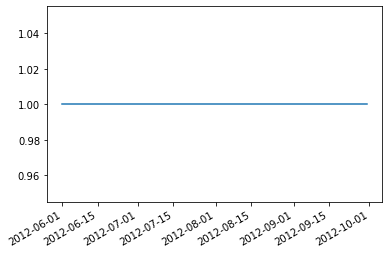

In [31]:
forestfire['date'].value_counts().plot.line()

2012-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: date, dtype: object

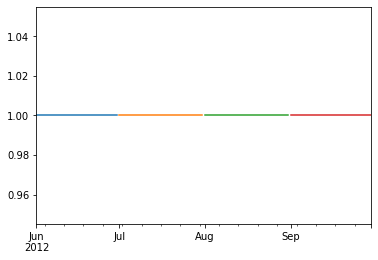

In [32]:
forestfire['date'].value_counts().resample('M').plot.line()

## Air Quality Time-series Dataset 

Let’s load another time-series dataset that contains both date and time, but in two separate columns.

In [33]:
airquality_url = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/TimeSeries/AirQualityUCI.csv'
# read first 5 columns for better visual clarity
airquality = pd.read_csv(airquality_url, sep=';').iloc[:,:5]
airquality.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT)
0,10/03/2004,18.00.00,"2,6",1360.0,150.0
1,10/03/2004,19.00.00,2,1292.0,112.0
2,10/03/2004,20.00.00,"2,2",1402.0,88.0
3,10/03/2004,21.00.00,"2,2",1376.0,80.0
4,10/03/2004,22.00.00,"1,6",1272.0,51.0


This time-series dataset contains Date in one column and Time in another column. Check the data types of the attributes

In [34]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9357 non-null   object 
 1   Time         9357 non-null   object 
 2   CO(GT)       9357 non-null   object 
 3   PT08.S1(CO)  9357 non-null   float64
 4   NMHC(GT)     9357 non-null   float64
dtypes: float64(2), object(3)
memory usage: 370.1+ KB


As expected, both Date and Time columns are in object data type. In contrast to our previous example, the Date attribute is the DD/MM/YYYY format and the Time attribute is in the HH.MM.SS format. Whenever we know the format of either date or time, we should pass it as an argument to the to_datetime method. Refer to the official documentation here for more information about different formats.

In [35]:
airquality['DATE'] = pd.to_datetime(airquality['Date'], format='%d/%m/%Y')
airquality['TIME'] = pd.to_datetime(airquality['Time'], format='%H.%M.%S')


We removed the original Date and Time columns as they were redundant to the new ones. The new attributes DATE and TIME are of datetime64 data type. As we have split the date in the previous example, we can split the time into an hour, minute and second elements using the dt method.

In [36]:
airquality.drop(columns=['Date', 'Time'], inplace=True)
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CO(GT)       9357 non-null   object        
 1   PT08.S1(CO)  9357 non-null   float64       
 2   NMHC(GT)     9357 non-null   float64       
 3   DATE         9357 non-null   datetime64[ns]
 4   TIME         9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 370.1+ KB


In [37]:
airquality['DAY'] = airquality['DATE'].dt.day
airquality['MONTH'] = airquality['DATE'].dt.month
airquality['YEAR'] = airquality['DATE'].dt.year

airquality['HOUR'] = airquality['TIME'].dt.hour
airquality['MINUTE'] = airquality['TIME'].dt.minute
airquality['SECOND'] = airquality['TIME'].dt.second

airquality.drop(columns=['DATE', 'TIME'], inplace=True)
airquality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),DAY,MONTH,YEAR,HOUR,MINUTE,SECOND
0,"2,6",1360.0,150.0,10.0,3.0,2004.0,18.0,0.0,0.0
1,2,1292.0,112.0,10.0,3.0,2004.0,19.0,0.0,0.0
2,"2,2",1402.0,88.0,10.0,3.0,2004.0,20.0,0.0,0.0
3,"2,2",1376.0,80.0,10.0,3.0,2004.0,21.0,0.0,0.0
4,"1,6",1272.0,51.0,10.0,3.0,2004.0,22.0,0.0,0.0


We can recall this example from the origin. The original dataset had 2 datetime columns: date (as object), time (as object). We converted them into 2 columns of datetime64 data type. In the last step, we split each element to form 6 new columns. However, we can merge all these split elements into a single feature of datetime64 data type to have every detail of date and time.

In [38]:
airquality['parsed'] = pd.to_datetime(airquality[['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND']])
airquality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),DAY,MONTH,YEAR,HOUR,MINUTE,SECOND,parsed
0,"2,6",1360.0,150.0,10.0,3.0,2004.0,18.0,0.0,0.0,2004-03-10 18:00:00
1,2,1292.0,112.0,10.0,3.0,2004.0,19.0,0.0,0.0,2004-03-10 19:00:00
2,"2,2",1402.0,88.0,10.0,3.0,2004.0,20.0,0.0,0.0,2004-03-10 20:00:00
3,"2,2",1376.0,80.0,10.0,3.0,2004.0,21.0,0.0,0.0,2004-03-10 21:00:00
4,"1,6",1272.0,51.0,10.0,3.0,2004.0,22.0,0.0,0.0,2004-03-10 22:00:00


In the above step, the default format `YYYY-mm-dd HH:MM:SS` is presented. But, we can have parsed datetime in the format we wish using the strftime method. Refer to the official documentation here for more formats. 

In [39]:
airquality['formatted_date'] = pd.to_datetime(airquality[['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND']]).dt.strftime('%d %b %Y, %I.%M.%S %p')
# display last 8 columns only for better visual clarity
airquality.head().iloc[:,-8:]

,DAY,MONTH,YEAR,HOUR,MINUTE,SECOND,parsed,formatted_date
0,10.0,3.0,2004.0,18.0,0.0,0.0,2004-03-10 18:00:00,"10 Mar 2004, 06.00.00 PM"
1,10.0,3.0,2004.0,19.0,0.0,0.0,2004-03-10 19:00:00,"10 Mar 2004, 07.00.00 PM"
2,10.0,3.0,2004.0,20.0,0.0,0.0,2004-03-10 20:00:00,"10 Mar 2004, 08.00.00 PM"
3,10.0,3.0,2004.0,21.0,0.0,0.0,2004-03-10 21:00:00,"10 Mar 2004, 09.00.00 PM"
4,10.0,3.0,2004.0,22.0,0.0,0.0,2004-03-10 22:00:00,"10 Mar 2004, 10.00.00 PM"


## Landslide Dataset

We discuss some more interesting things about datetime parsing with a complex time-series dataset. 

In [40]:
url = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/TimeSeries/landslides_data.csv'
# load limited features only - for better visual clarity
landslides = pd.read_csv(url).loc[:,['date', 'country_code', 'state/province', 'hazard_type']]
landslides.head()

,date,country_code,state/province,hazard_type
0,03-02-2007,US,Virginia,Landslide
1,3/22/07,US,Ohio,Landslide
2,04-06-2007,US,Pennsylvania,Landslide
3,4/14/07,CA,Quebec,Landslide
4,4/15/07,US,Kentucky,Landslide


It is observed that the feature `date` has different formats. Hence, we can not parse it with a predefined format. Let’s have a thorough check for any other formats.

In [41]:
length = landslides['date'].str.len()
length.value_counts()

7.0     818
10.0    649
8.0     219
16.0      3
17.0      1
Name: date, dtype: int64

Date is presented in five different lengths. Lengths 7 and 8 may refer to a common format. Length 10 may refer to another format. Lengths 16 and 17 may refer to some other format.

Let’s do some analysis to find the hidden truth using NumPy!

In [42]:
ind_7 = np.where([length==7])[1][0]
ind_8 = np.where([length==8])[1][0]
ind_10 = np.where([length==10])[1][0]
ind_16 = np.where([length==16])[1][0]
ind_17 = np.where([length==17])[1][0]

# load one example row for each date length
landslides.loc[[ind_7,ind_8,ind_10,ind_16,ind_17]]

,date,country_code,state/province,hazard_type
1,3/22/07,US,Ohio,Landslide
48,10/13/07,CO,Cauca,Landslide
0,03-02-2007,US,Virginia,Landslide
343,5/14/10 05:00:00,US,Missouri,Landslide
826,10/25/11 09:30:00,TT,San Juan/Laventille,Landslide


As we guessed, there are three different date formats in the dataset. The date presented along with time is the least available format with just 4 rows. Hence, we drop these 4 rows for the sake of simplicity.

In [43]:
drop_ind = np.where([length>=16])[1]
landslides.drop(index=drop_ind, inplace=True)


In [44]:
length = landslides['date'].str.len()
length.value_counts()

7.0     818
10.0    649
8.0     219
Name: date, dtype: int64

We need not worry about different formats in date. Pandas’ `to_datetime` method takes an optional boolean argument `infer_datetime_format`. If we pass `True` as the argument, Pandas will analyze the format and convert it suitably.

In [45]:
landslides['parsed_date'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)
landslides.head()

,date,country_code,state/province,hazard_type,parsed_date
0,03-02-2007,US,Virginia,Landslide,2007-03-02
1,3/22/07,US,Ohio,Landslide,2007-03-22
2,04-06-2007,US,Pennsylvania,Landslide,2007-04-06
3,4/14/07,CA,Quebec,Landslide,2007-04-14
4,4/15/07,US,Kentucky,Landslide,2007-04-15


Let’s remove the original column to avoid redundancy. We can explore some more features that Pandas provide along with datetime parsing.

In [46]:
landslides.drop(columns=['date'], inplace=True)
landslides.head()

,country_code,state/province,hazard_type,parsed_date
0,US,Virginia,Landslide,2007-03-02
1,US,Ohio,Landslide,2007-03-22
2,US,Pennsylvania,Landslide,2007-04-06
3,CA,Quebec,Landslide,2007-04-14
4,US,Kentucky,Landslide,2007-04-15


We can calculate the number of landslides per day by analyzing the parsed_date and plot it using Pandas plotting. Pandas plotting is a simple interface built on top of Matplotlib.

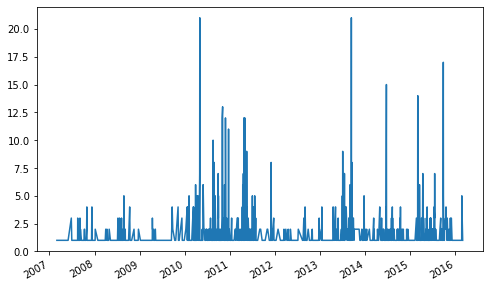

In [49]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().sort_values().plot.line()
plt.show()

Pandas provides a powerful analysis method, named resample for datetime64 features. This method permits different analysis year-wise, month-wise, day-wise, and so on. This helps us find the pattern among the time-series data.

The total number of yearly landslides can be calculated as follows.

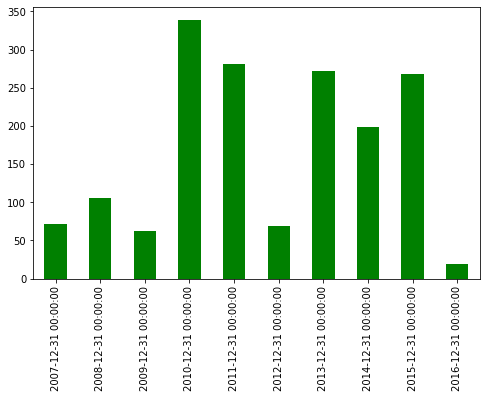

In [48]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().resample('Y').sum().plot.bar(color='g')
plt.show()

Year-wise mean slides can be calculated as follows.

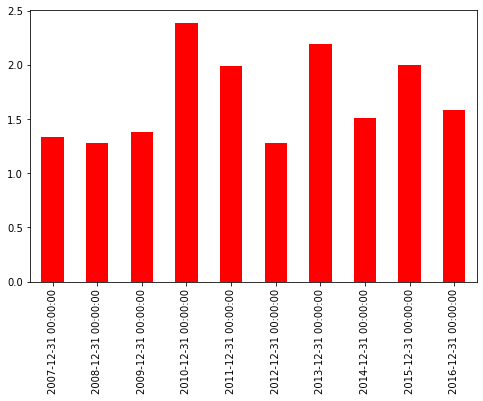

In [50]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().resample('Y').mean().plot.bar(color='r')
plt.show()

According to the plot, the year 2010 had more landslides than any other year (as per the dataset). 

The total number of landslides calculated in a month-wise manner is as follows.

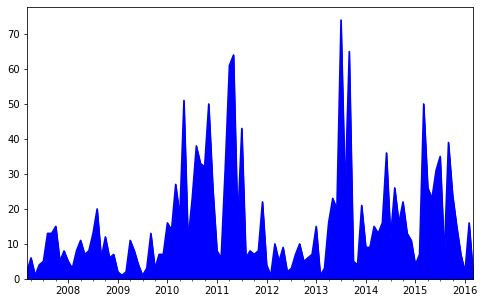

In [51]:
plt.figure(figsize=(8,5))
landslides['parsed_date'].value_counts().resample('M').sum().plot.area(color='b')
plt.show()

#**Related Articles:**

> * [Date Time Parsing with Pandas](https://analyticsindiamag.com/datetime-parsing-with-pandas/)